In [1]:
%matplotlib inline
import numpy as np
import os.path as osp
from glob import glob
from collections import OrderedDict
from scipy.misc import imread

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
VAL_IMAGE_DIR = '/mnt/data/ilsvrc/dataset/ILSVRC2012_img_val'
VAL_BBOX_FILE = 'cls_loc_val.txt'

In [3]:
def read_bbox_file(file_path):
    img_bboxes = OrderedDict()
    with open(file_path) as f:
        lines = f.readlines()
        for l in lines:
            l = l.strip().split()
            img = l[0]
            bboxes = map(int, l[3:])
            bboxes = np.asarray(bboxes).reshape(-1, 4)
            img_bboxes[img] = bboxes
    return img_bboxes        

In [4]:
def load_img_shape(img_dir, ext='JPEG'):
    files = sorted(glob(osp.join(img_dir, '*.' + ext)))
    img_shapes = OrderedDict(
        [(osp.basename(f), imread(f).shape) for f in files])
    return img_shapes

In [5]:
img_bboxes = read_bbox_file(VAL_BBOX_FILE)
img_shapes = load_img_shape(VAL_IMAGE_DIR)

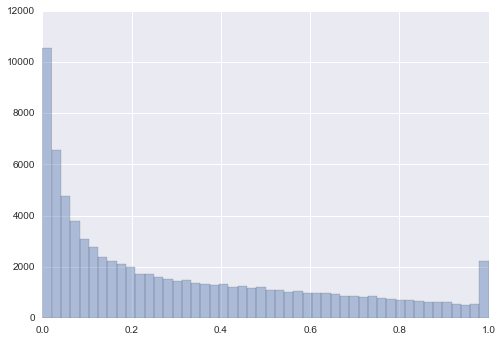

In [6]:
# ratios histogram for all the bboxes
ratios = []
for img, bboxes in img_bboxes.iteritems():
    img_area = np.prod(img_shapes[img][:2])
    for x, y, w, h in bboxes:
        box_area = w * h
        area_ratio = box_area * 1.0 / img_area
        ratios.append(area_ratio)
sns.distplot(np.asarray(ratios), kde=False)

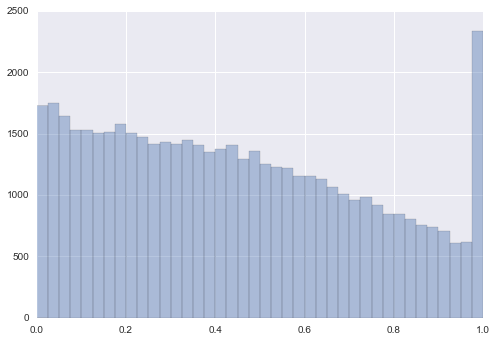

In [7]:
# ratios histogram for the largest bbox in each image
ratios = []
for img, bboxes in img_bboxes.iteritems():
    img_area = np.prod(img_shapes[img][:2])
    largest_box_area = np.prod(bboxes[:, 2:], axis=1).max()
    area_ratio = largest_box_area * 1.0 / img_area
    ratios.append(area_ratio)
sns.distplot(np.asarray(ratios), kde=False)

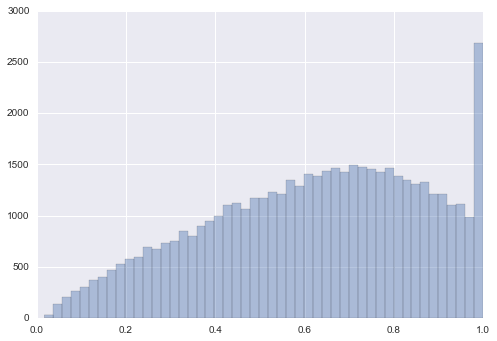

In [8]:
# ratios histogram for the size of the largest bbox in each image
ratios = []
for img, bboxes in img_bboxes.iteritems():
    img_area = np.prod(img_shapes[img][:2])
    largest_box_area = np.prod(bboxes[:, 2:], axis=1).max()
    area_ratio = largest_box_area * 1.0 / img_area
    ratios.append(area_ratio)
sns.distplot(np.sqrt(np.asarray(ratios)), kde=False)

0.08418
0.797671619036
0.0170174251925 0.949986293761


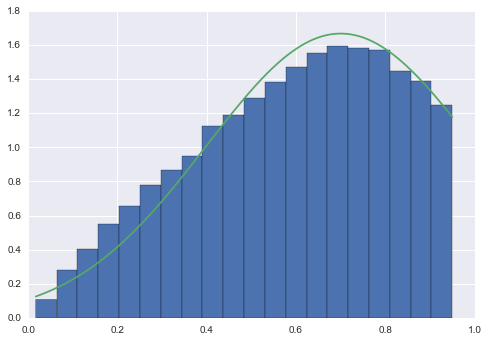

In [31]:
# Fitting a gaussian distribution
import matplotlib.mlab as mlab
from scipy.stats import norm

ratios = []
for img, bboxes in img_bboxes.iteritems():
    img_area = np.prod(img_shapes[img][:2])
    largest_box_area = np.prod(bboxes[:, 2:], axis=1).max()
    area_ratio = largest_box_area * 1.0 / img_area
    ratios.append(area_ratio)
ratios = np.sqrt(np.asarray(ratios))

print np.sum(ratios >= 0.95) * 1.0 / ratios.size
remains = ratios[np.where(ratios < 0.95)]
mu = 0.7
sigma = 0.3
trancated_cdf = norm.cdf(0.95, 0.7, 0.3)
print trancated_cdf

plt.hist(remains, normed=True, bins=20)
x = np.linspace(min(remains), max(remains),100)
print min(remains), max(remains)
plt.plot(x, mlab.normpdf(x,mu,sigma) / trancated_cdf)
plt.show()